<a href="https://colab.research.google.com/github/GraLesl/MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

# Concepts to Cover
- Show how vectors are combined (Linear Combination)
- What is linear independence and dimensions
- Orthogonality
- Eigenvalues

Lienar Regression



# Linear Space

## Linear Combinations

Linear combinations are vectors made from the scalar multiplication and additiona of individual vectors. A linear subspace is defined as a set of linear combinations.



In [ ]:
v1 = np.array([1,4,7])
v2 = np.array([5,2,-3])
a = 2
b = 4
v3 = a*v1 + b*v2

ans = np.array([22,16,2])
print(v3==ans)


[ True  True  True]


## Linear Independence

One important idea with vecotrs may be how can we create the smallest set of vectors such that all vectors in a given amount of dimensions. This requires a set of vectors to be **linear independent**, which means none can be written as the combination of any others. A set of linearly independent vecotors which can represent a full vector space is called a **Basis**.

## Orthogonality
One common way to inspect if vectors are independent of eachother is if they are **orthogonal**. Orthogonality, put simply, means that two vectors are perpendicular to eachother and as such, one vector is unable to be written as a combination of the other. This property can be determined through the dot product of two vectors, if their dot product is zero, they are orthogonal.

In [9]:
v1 = np.array([0,1])
v2 = np.array([1,0])
ans = str(np.dot(v1,v2) == 0)

print("Vectors are orthogonal: " + ans)

v1 = np.array([3,4])
v2 = np.array([-8,6])
ans = str(np.dot(v1,v2) == 0)

print("Vectors are orthogonal: " + ans)

Vectors are orthogonal: True
Vectors are orthogonal: True


## Eigenvalues and Eigenvectors

Another critical compoenent of linear algebra is the idea of eigenvaleus and eigenvectors. An eigenvalue $\lambda$ and an eigenvector $x$ can satisfy this equation for a square matrix $A$: $Ax = \lambda x$. The eigenvalue is able to replicate the matrix multiplication of an eigenvector of $A$.

These values can be solved rather easily in python as shown below.

In [15]:
a = np.array([[2,5,3],
             [12,4,-3],
             [-2,7,1]])

eVal, eVect = np.linalg.eig(a)

print("Eigenvalues:")
print(eVal)
print("Eigenvectors:")
print(eVect)

Eigenvalues
[11.10889678+0.j         -2.05444839+4.73545689j -2.05444839-4.73545689j]
Eigenvectors
[[ 0.53884526+0.j         -0.16960958+0.32978836j -0.16960958-0.32978836j]
 [ 0.73870721+0.j          0.28842133-0.42805775j  0.28842133+0.42805775j]
 [ 0.40491659+0.j         -0.77204399+0.j         -0.77204399-0.j        ]]


## Linear Regression
For systems assumed to have linear dependancy on given parameters, it is useful to have methods which model a given data set with a linear fit curve. This Process is called **Linear Regression**.

### QR Method
The first method to inspect is the QR method, which can find the eigenvalues of a given matrix through a simple process. A matrix $A$, whose eigenvalues are of interest, can be repeatedly decomposed into a $Q$ and $R$ matrix such that $A = QR$. Using the Grahm-Schmidt process, these matricies can be found.


In [17]:
from numpy.linalg import qr

x = np.array([[4,2], [7,-1]])

Q,R = qr(x)
print('QL: ', Q)
print('R: ', R)

y  = np.dot(Q,R)
print('QR:', y)

iterations = [1,5,10,20]
for i in range(20):
  Q,R = qr(x)
  x = np.dot(R,Q)
  if i+1 in iterations:
    print(f'Iteration {i+1}:')
    print(x)

QL:  [[-0.49613894 -0.86824314]
 [-0.86824314  0.49613894]]
R:  [[-8.06225775 -0.12403473]
 [ 0.         -2.23262522]]
QR: [[ 4.  2.]
 [ 7. -1.]]
Iteration 1:
[[ 4.10769231  6.93846154]
 [ 1.93846154 -1.10769231]]
Iteration 5:
[[ 5.89715037  5.17676458]
 [ 0.17676458 -2.89715037]]
Iteration 10:
[[ 6.00313650e+00 -4.99434595e+00]
 [ 5.65405265e-03 -3.00313650e+00]]
Iteration 20:
[[ 6.00000307e+00 -4.99999448e+00]
 [ 5.51769087e-06 -3.00000307e+00]]


## Least Squares Method

Another approach is the least squares method. Based on the reduction of a given system of equations to the form $\hat{Y} = A β$ where Y is a colum vector with $\hat{Y}_i = \hat{y}(x_i)$, $β = α_i,F_i(x)$ and $A$ be an $ m $ by $ n$ matrix such atht the i-th column of $A$ is $F_i(x)$.

To get as close as possible, we want a vector $Y - \hat{Y}$ that is perpendicular to the vector $\hat{Y}$. The final solution to this is $β = (A^TA)^{-1}A^TY$

With this forumla for β, a linear regression can be performed for an example data set below.


[[1.58990348]
 [0.97570683]]


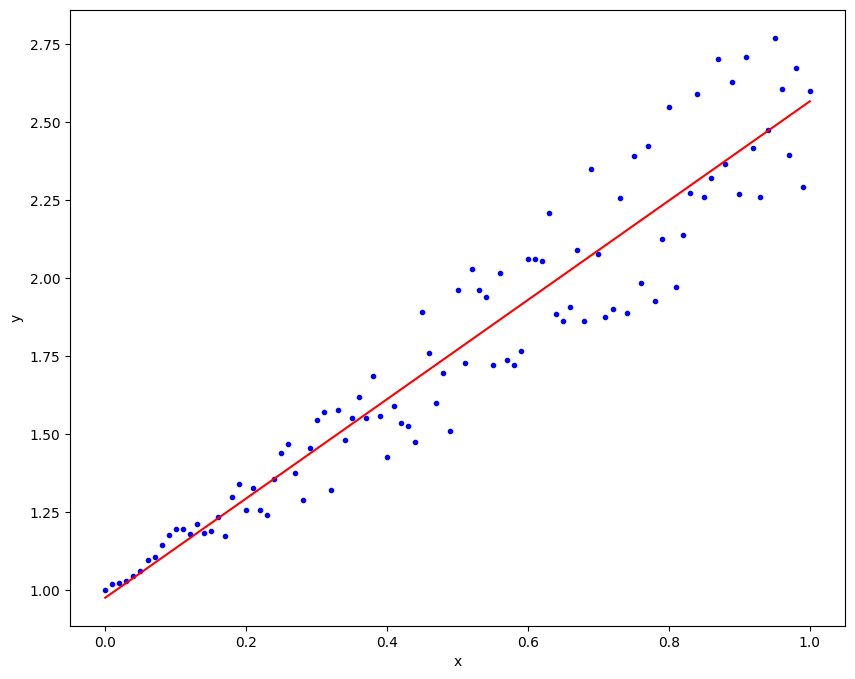

In [19]:
from scipy import optimize
import matplotlib.pyplot as plt

x = np.linspace(0,1,101)
y = 1 + x + x * np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
y = y[:,np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

plt.figure(figsize = (10,8))
plt.plot(x,y,'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()